In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
# import openpyxl.drawing
from openpyxl.drawing.image import Image
import os

In [61]:
def exist_file(file_name):
    if not os.path.exists(file_name):
        workbook = openpyxl.Workbook()
        sheet = workbook.active
        sheet.title = "Biểu đồ"
        workbook.save(file_name)
        return workbook, sheet
    else:
        workbook = openpyxl.load_workbook(file_name)
        sheet = workbook["Biểu đồ"]
        return workbook, sheet

In [62]:
file_name = "visitor_data_with_chart.xlsx"
workbook, sheet = exist_file(file_name)
visitor_data = pd.read_excel("Company confix data.xlsx")
# visitor_data.info()

channel_methor_by_id = visitor_data.groupby("Channel")["Visitor id"].count()
channel_methor_by_id
plt.pie(x=channel_methor_by_id, labels=channel_methor_by_id.index)
plt.savefig("visitor_distribution_channel.png")
plt.close()
img = Image("visitor_distribution_channel.png")
sheet.add_image(img)
workbook.save("visitor_data_with_chart.xlsx")


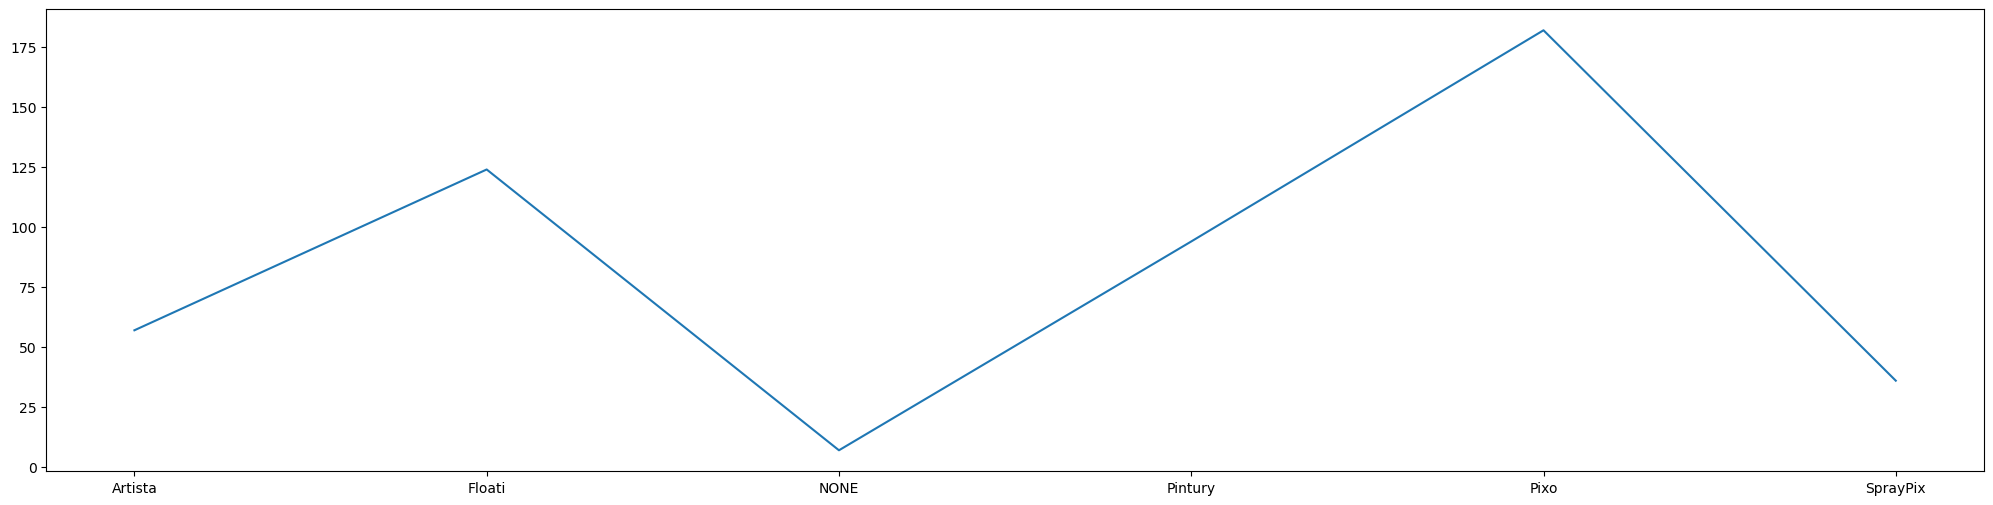

In [24]:
product_methor_by_pricing = visitor_data.groupby("Products")["Pricing plan"].count()
plt.figure(figsize=(25,6))
plt.plot(product_methor_by_pricing.index, product_methor_by_pricing)
plt.show()

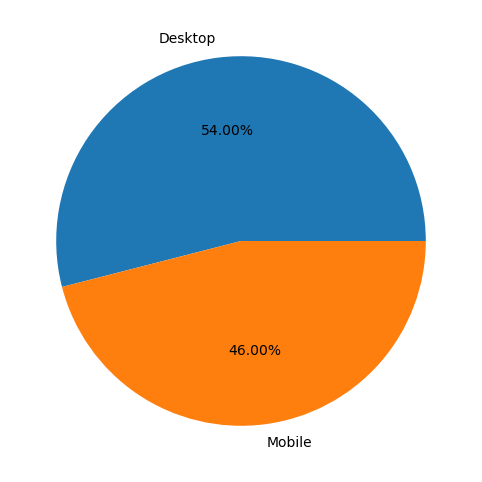

In [30]:
device_methor_by_visitorid = visitor_data.groupby("Device type")["Visitor id"].count()
plt.figure(figsize=(25,6))
plt.pie(device_methor_by_visitorid, labels = device_methor_by_visitorid.index, autopct="%1.2f%%")
plt.show()

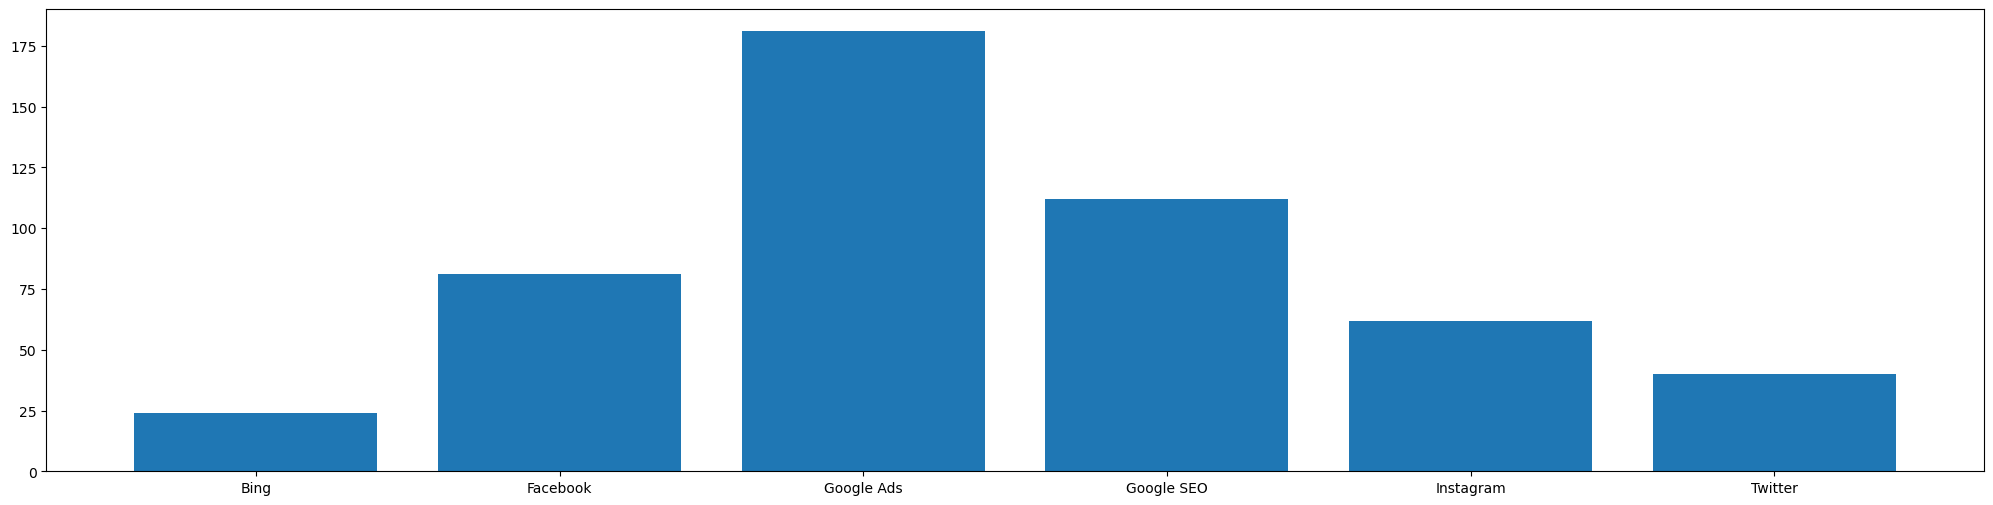

In [33]:
channel_methor_by_city = visitor_data.groupby("Channel")["City"].count()
plt.figure(figsize=(25,6))
plt.bar(channel_methor_by_city.index, channel_methor_by_city.values)
plt.show()